<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_07/c_dimensionality_reduction_data_bricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255: Assignment 07 - Part C
## Dimensionality Reduction using Data Bricks
### Assignment Instructions

Demonstrate dimensionality reduction using data bricks.

Hints:

1. [cs120_lab4_pca (Python)](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4574377819293972/3981813153837121/3186223000943570/latest.html)


Dataset Source:

Dataset is generated in-line for this assignment.


Sources Used:
1. All provided Hints
2. ChatGPT


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install matplotlib
!pip install seaborn

In [8]:
!pip install umap
!pip install umap-learn[plot]

In [9]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.plotting.register_matplotlib_converters()
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

### Generating Dataset

In [10]:
# Generating a synthetic medical dataset on pregnancies
# Features: Age, Number of Pregnancies, Blood Pressure, Blood Glucose Level, Weight, Height
np.random.seed(0)
data_size = 100
data = {
    'Age': np.random.randint(18, 45, size=data_size),
    'Number_of_Pregnancies': np.random.randint(0, 10, size=data_size),
    'Blood_Pressure': np.random.randint(70, 140, size=data_size),
    'Blood_Glucose_Level': np.random.randint(60, 200, size=data_size),
    'Weight': np.random.randint(50, 100, size=data_size),
    'Height': np.random.randint(150, 200, size=data_size)
}
df = pd.DataFrame(data)

### Normalizing Dataset

In [11]:
df_normalized = (df - df.mean()) / df.std()

### Handling Missing Values

In [12]:
df_normalized.fillna(df_normalized.mean(), inplace=True)

### Exploratory Data Analysis (EDA)

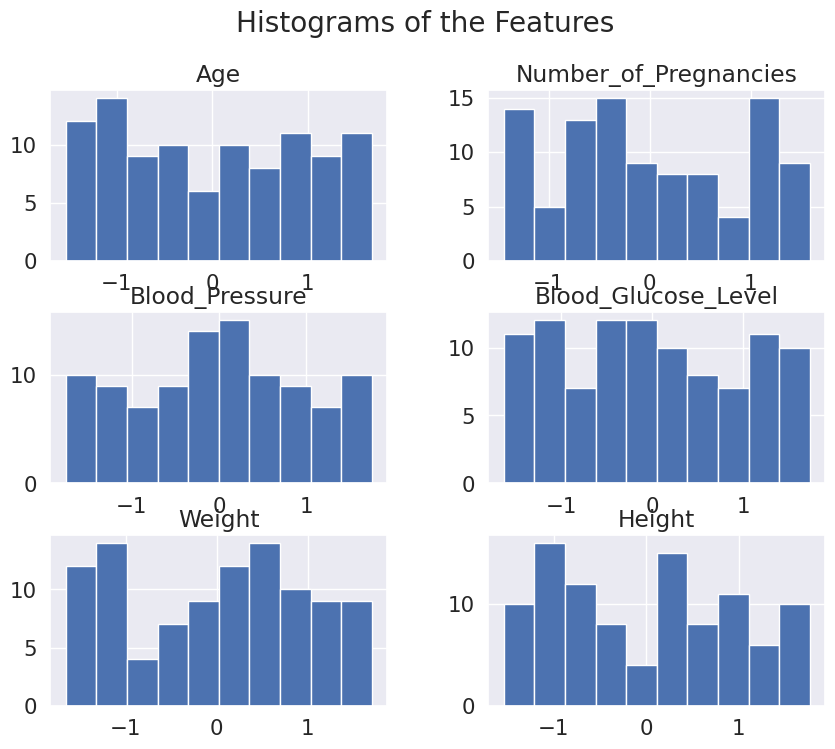

In [13]:
# Histograms
df_normalized.hist(figsize=(10, 8))
plt.suptitle("Histograms of the Features")
plt.show()

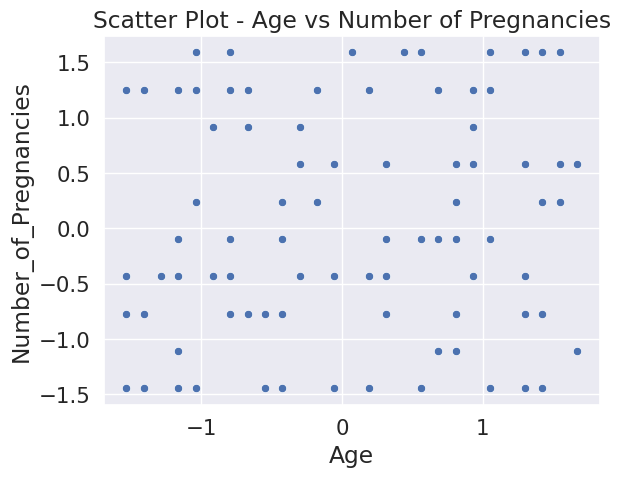

In [14]:
# Scatter plot of two features
sns.scatterplot(x='Age', y='Number_of_Pregnancies', data=df_normalized)
plt.title("Scatter Plot - Age vs Number of Pregnancies")
plt.show()

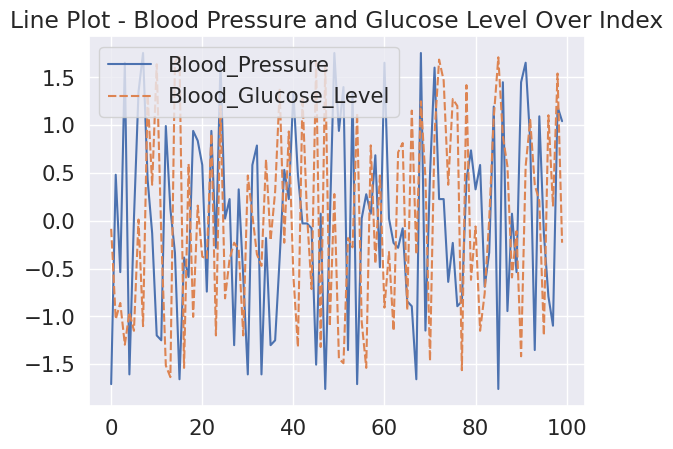

In [15]:
# Line plot
sns.lineplot(data=df_normalized[['Blood_Pressure', 'Blood_Glucose_Level']])
plt.title("Line Plot - Blood Pressure and Glucose Level Over Index")
plt.show()


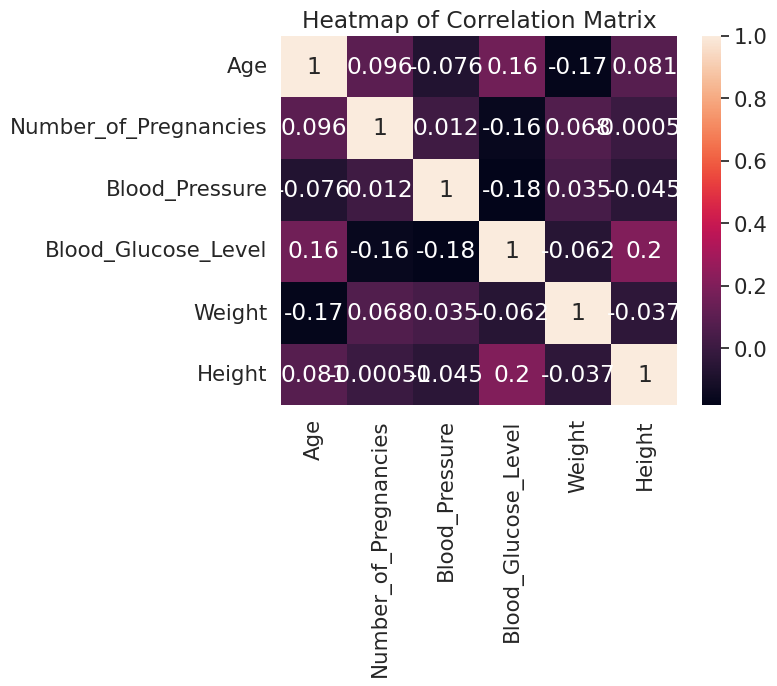

In [16]:
# Heatmap of the correlation matrix
sns.heatmap(df_normalized.corr(), annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

### Dimensionality Reduction

#### PCA

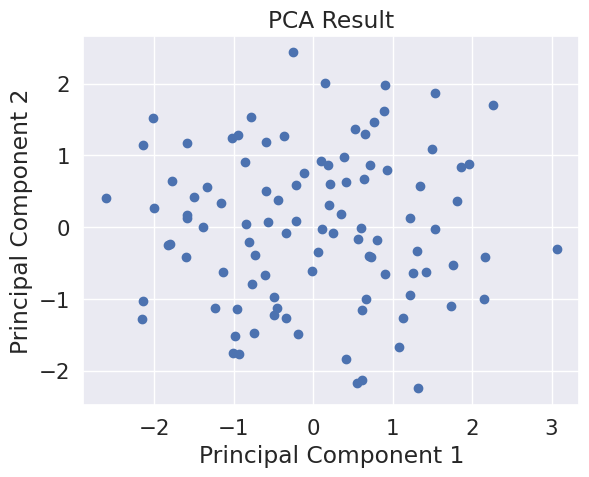

In [17]:
# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### t-SNE

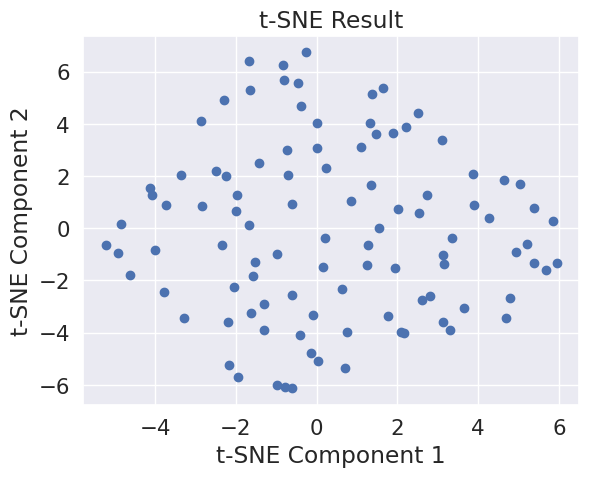

In [18]:
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_normalized)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1])
plt.title("t-SNE Result")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

#### UMAP

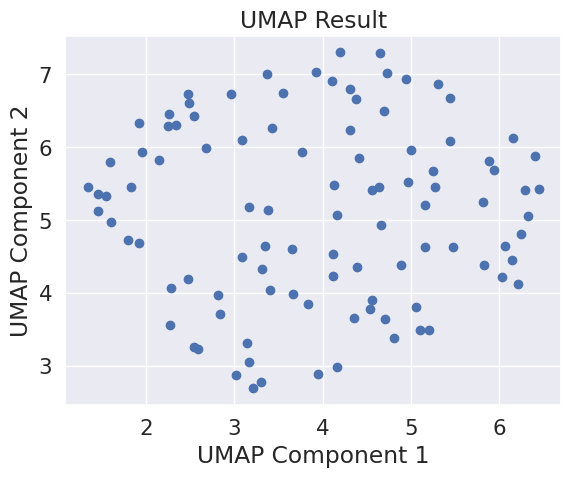

In [19]:
# UMAP
reducer = umap.UMAP()
df_umap = reducer.fit_transform(df_normalized)
plt.scatter(df_umap[:, 0], df_umap[:, 1])
plt.title("UMAP Result")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()